# Amazon Video Games Review Data

This notebook prepares the review data that will be used for the sentiment analysis task. To save the computational resource, the original data will be random sampled to 100k. As ploting the distribution of consumer ratings, the categories are unfortunately imbalanced. Therefore, a smaller sample with better class-balanced is also created using undersampling method.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

read data

In [2]:
path = "Video_Games_5.json"

In [3]:
df = pd.read_json(path, lines = True)
df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000,NaN,NaN,NaN
1,4,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1437955200,NaN,NaN,NaN
2,3,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,1424649600,NaN,NaN,NaN
3,2,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,1424390400,NaN,NaN,NaN
4,5,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,1419465600,NaN,NaN,NaN


In [4]:
df.shape

(497577, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497577 entries, 0 to 497576
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   overall         497577 non-null  int64 
 1   verified        497577 non-null  bool  
 2   reviewTime      497577 non-null  object
 3   reviewerID      497577 non-null  object
 4   asin            497577 non-null  object
 5   reviewerName    497501 non-null  object
 6   reviewText      497419 non-null  object
 7   summary         497468 non-null  object
 8   unixReviewTime  497577 non-null  int64 
 9   vote            107793 non-null  object
 10  style           289237 non-null  object
 11  image           3634 non-null    object
dtypes: bool(1), int64(2), object(9)
memory usage: 42.2+ MB


Data Description

* reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B
* asin - ID of the product, e.g. 0000013714
* reviewerName - name of the reviewer
* vote - helpful votes of the review
* style - a disctionary of the product metadata, e.g., "Format" is "Hardcover"
* reviewText - text of the review
* overall - rating of the product
* summary - summary of the review
* unixReviewTime - time of the review (unix time)
* reviewTime - time of the review (raw)
* image - images that users post after they have received the product

In [6]:
df=df.rename(columns={"overall":"score"})
df.head()

,score,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000,NaN,NaN,NaN
1,4,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1437955200,NaN,NaN,NaN
2,3,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,1424649600,NaN,NaN,NaN
3,2,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,1424390400,NaN,NaN,NaN
4,5,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,1419465600,NaN,NaN,NaN


The number of reviewd products

In [8]:
print("The number of the reviewd prudcts are: "+ str(len(df['asin'].value_counts(dropna=False))))

The number of the reviewd prudcts are: 17408


Distribution of the ratings

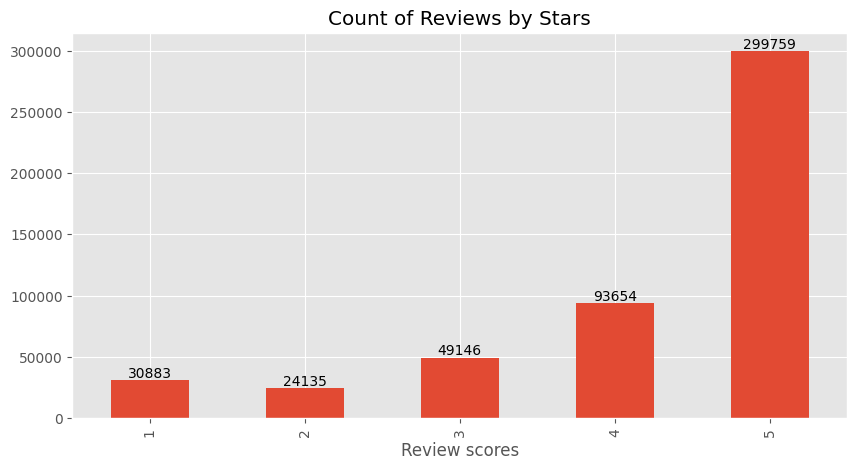

In [9]:
ax = df['score'].value_counts().sort_index().plot(kind='bar',
        title='Count of Reviews by Stars',
        figsize=(10, 5))
ax.set_xlabel('Review scores')
# Annotate each bar with the count
for bar in ax.patches:
    bar_height = bar.get_height()
    bar_x = bar.get_x() + bar.get_width() / 2
    # text annotation
    ax.text(bar_x, bar_height, int(bar_height), ha='center', va='bottom')
plt.show()

The distribution of ratings are imbalanced. One of the method is using undersampling method to get a more balanced class distribution.

In [10]:
r1 = df[df['score']==1].sample(n=1000)
r2 = df[df['score']==2].sample(n=1000)
r3 = df[df['score']==3].sample(n=1000)
r4 = df[df['score']==4].sample(n=1000)
r5 = df[df['score']==5].sample(n=1500)

In [11]:
undersampling = pd.concat([r1, r2, r3, r4, r5])

In [12]:
undersampling['score'].value_counts(dropna=False)

5    1500
1    1000
2    1000
3    1000
4    1000
Name: score, dtype: int64

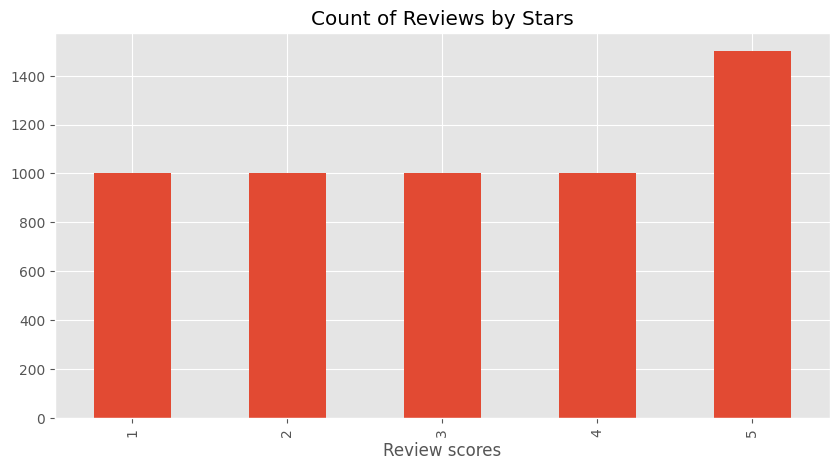

In [13]:
ax2 = undersampling['score'].value_counts().sort_index().plot(kind='bar',
        title='Count of Reviews by Stars',
        figsize=(10, 5))
ax2.set_xlabel('Review scores')
plt.show()

In [15]:
undersampling.to_csv("undersample.csv")

Random Sampling of 100K Reviews

In [14]:
samples_100k = df.sample(n=100000,random_state=42)

In [16]:
samples_100k.to_csv("samples_100k.csv")